In [119]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import missingno as msno
%matplotlib inline
import seaborn as sns 
pd.set_option("display.max_columns",500)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import dummy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import time
from  sklearn import  linear_model
from sklearn  import ensemble
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
import category_encoders as ce
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
pd.set_option('display.float_format', lambda x: '%8.2f' % x)
pd.set_option('display.max_colwidth',2000)
from sklearn.model_selection import RandomizedSearchCV

In [120]:
data=pd.read_csv('dataf.csv')
data['NumberofFloors'].replace('non renseigné',0,inplace=True )
data['NumberofFloors']=pd.to_numeric(data['NumberofFloors'],downcast='float')

data['YearBuilt']=pd.to_numeric(data['YearBuilt'],downcast='float')
data['age']=2021-data['YearBuilt']

In [121]:
data.shape

(1485, 29)

### Encodage des variables catégorielles

In [122]:
encoder=ce.OneHotEncoder(cols=['Neighborhood','PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','ZipCode'])
data=encoder.fit_transform(data)

In [123]:
data.drop(columns=['PropertyName','YearBuilt','TaxParcelIdentificationNumber','BuildingType','ListOfAllPropertyUseTypes','SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)'],inplace=True)

In [124]:
colonnes=data.columns.to_list()

In [125]:
colonnes.pop(-2)

'ghgel'

In [126]:
colonnes.pop(-2)

'sitel'

### Calcul  train time, test time, r2score, et rmse  pour DummyRegressor,LinearRegression,Lasso,Ridge,RandomForestRegressor,GradientBoostingRegressor,XGBessor

## Meilleur modéle pour la variabale  sitel 

In [127]:
#X=data.loc[:,['CouncilDistrictCode','ENERGYSTARScore','LargestPropertyUseTypeGFA','Latitude','Longitude','NumberofBuildings','OSEBuildingID','PropertyGFABuilding','PropertyGFAParking','PropertyGFATotal','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','YearBuilt','ZipCode']]
y=data.iloc[:,-3]
X=data.loc[:,colonnes]

#Standardscaler pour  normaliser les variable numeriques
std_scale= preprocessing.RobustScaler().fit(X)
X_scale=std_scale.transform(X)

#Split le dataset en train et test
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.25)

# modele DummyRegressor
dm=dummy.DummyRegressor()
start_time_train=time.time()
dm.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = dm.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test_predict,y_test)))
r2 = r2_score(y_test, y_test_predict)
R1=pd.DataFrame([['RMSE',rmse],['score',r2],['train time',train_time],['test time',test_time]],columns=['indicateurs','Modele dummy'])

# modele Linear Regressor
lr=linear_model.LinearRegression()
start_time_train=time.time()
lr.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = lr.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test_predict,y_test)))
r2 = r2_score(y_test, y_test_predict)
R2=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle linéaire']) 

# modele Ridge 
rg=linear_model.Ridge()
start_time_train=time.time()
rg.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = rg.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
R3=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle linéaire Ridge'])

# modele Lasso 
ls=linear_model.Lasso()
start_time_train=time.time()
ls.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = ls.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
R4=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle linéaire Lasso'])

# modele Random Forest Regressor 
rf=ensemble.RandomForestRegressor()
start_time_train=time.time()
rf.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = rf.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
R5=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle RandomForestRegressor'])

#modele GradientBoosting Regressor 
gr=ensemble.GradientBoostingRegressor()
start_time_train=time.time()
gr.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = gr.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
R6=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle GradientBoostingRegressor'])

# modele XGBRegressor
xg=xgb.XGBRegressor()
start_time_train=time.time()
xg.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = xg.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
R7=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle XGBRegressor']) 

#affichage  resultat  pour chaque modele
pd.concat([R1,R2,R3,R4,R5,R6,R7],axis=1)

indicateurs  Modele dummy  Modéle linéaire  Modéle linéaire Ridge  \
0        RMSE          1.43        194020.84                   0.84   
1       score         -0.00  -18489458790.99                   0.65   
2  train time          0.00             0.25                   0.01   
3   test time          0.00             0.00                   0.00   

   Modéle linéaire Lasso  Modéle RandomForestRegressor  \
0                   1.31                          0.76   
1                   0.16                          0.72   
2                   0.01                          1.76   
3                   0.00                          0.00   

   Modéle GradientBoostingRegressor  Modéle XGBRegressor  
0                              0.71                 0.72  
1                              0.75                 0.74  
2                              0.66                 0.69  
3                              0.00                 0.02

#### Visualisation des indicateurs en fonction des différents modéles 



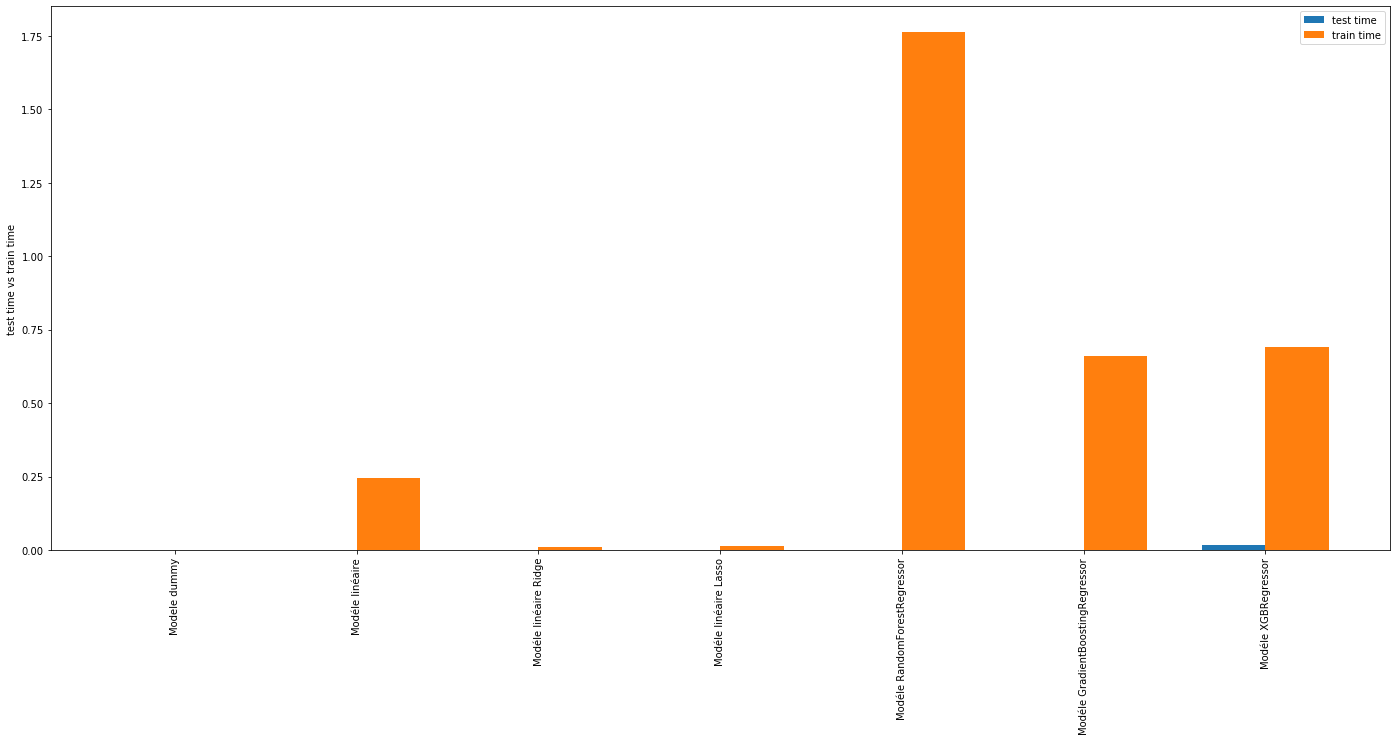

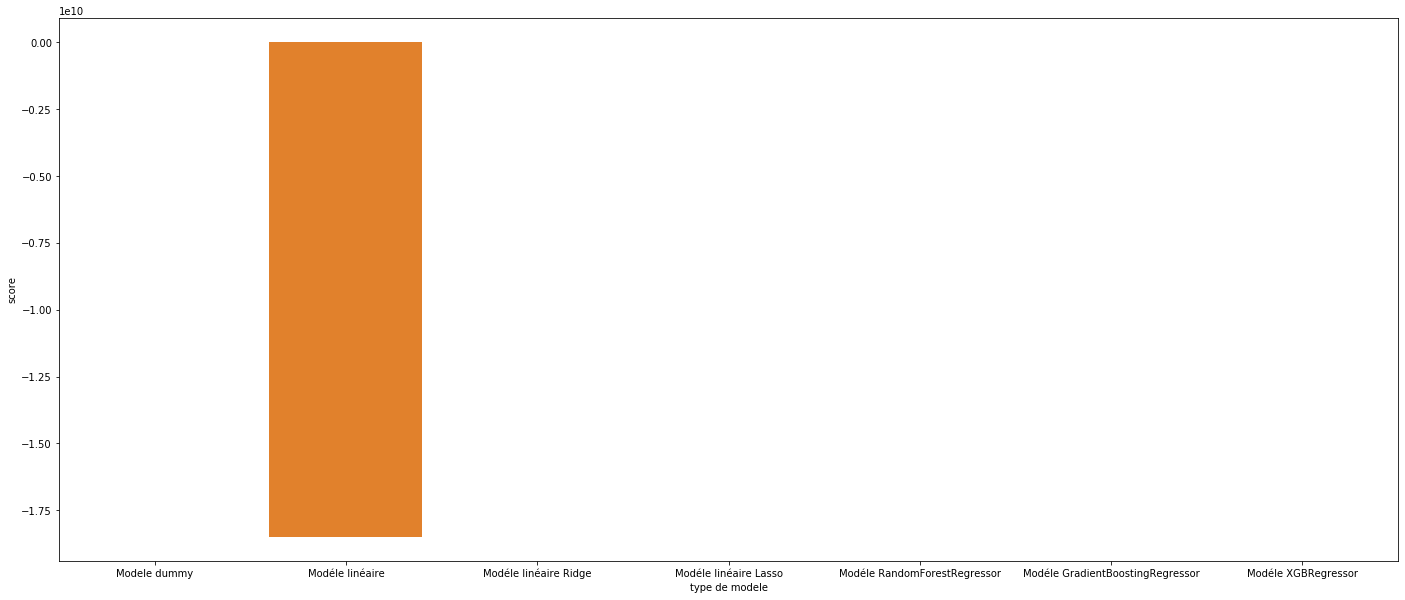

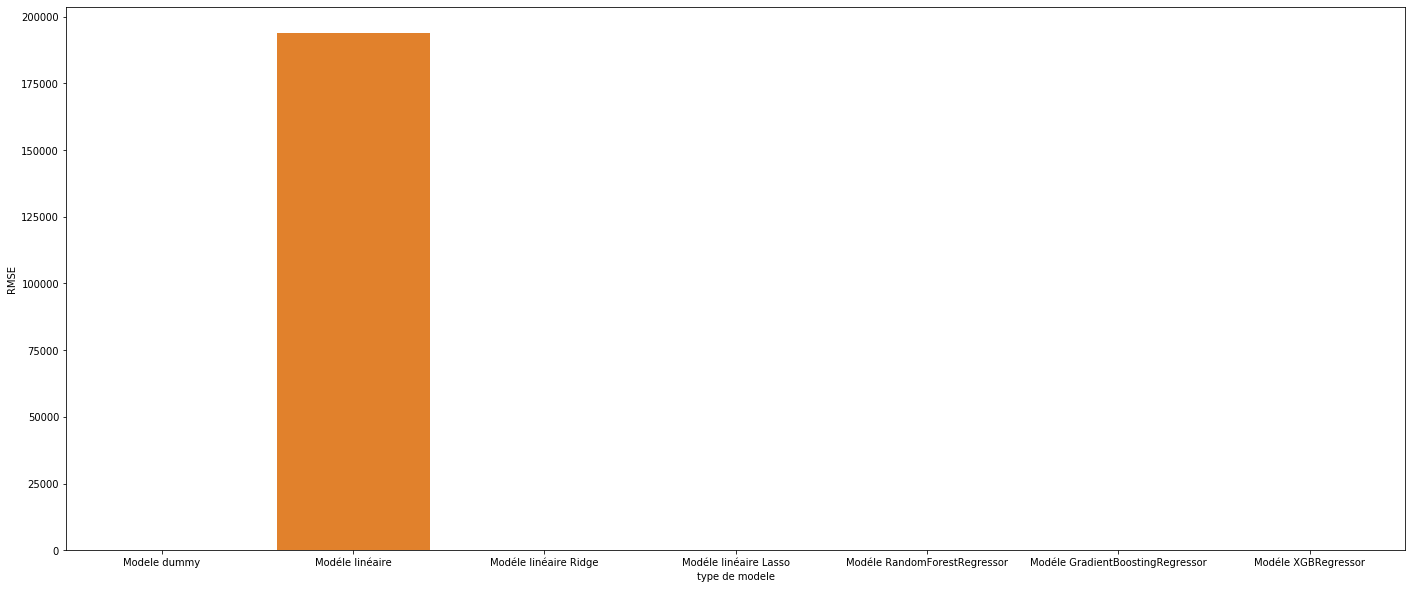

In [128]:
# creation un dataframe Re à partir des indicteurs et des modeles 
R=pd.concat([R1,R2,R3,R4,R5,R6,R7],axis=1)
Re=R.T
Re['type de modele']=Re.index
Re.rename(index={'Modele dummy':0,'Modele linéaire':1,'Modele linéaire Ridge':2,'Modele linéaire Lasso':3,'Modele RandomForestRegressor':4,'Modele GradientBoostingRegressor':5,'Modele XGBRegressor':6},columns={0:'RMSE',1:'score',2:'train time',3:'test time'}, inplace=True)
Re.drop('indicateurs',inplace=True)
Re=Re[['type de modele','RMSE', 'score', 'train time', 'test time']]

x = np.arange(len(Re['type de modele']))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(24,10))
ax.bar(x - width/2,Re['test time'],width,label='test time')
ax.bar(x + width/2,Re['train time'] ,width,label='train time')
ax.set_xticks(x)
ax.set_xticklabels(Re['type de modele'],rotation=90)
ax.set_ylabel('test time vs train time')
ax.legend()
plt.figure(figsize=(24,10))
sns.barplot(data=Re,x='type de modele',y='score')
plt.figure(figsize=(24,10))
sns.barplot(data=Re,x='type de modele',y='RMSE')

 le temps du train est superieur à celui du test pour les tous le modéles

###  Entraînement avec cross validation : les modéles sans paramétres 

In [129]:
cv=KFold(5)
# modele DummyRegressor
all_accuracies1 = cross_val_score(estimator=dm, X=X_train, y=y_train, cv=cv)

# modele Linear Regressor
all_accuracies2 = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=cv)

# modele GradientBoosting Regressor
all_accuracies3 = cross_val_score(estimator=gr, X=X_train, y=y_train, cv=cv)

# modele lasso 
all_accuracies4 = cross_val_score(estimator=ls, X=X_train, y=y_train, cv=cv)

# modele ridge 
all_accuracies5 = cross_val_score(estimator=ls, X=X_train, y=y_train, cv=cv)

#modele XGBRegressor
all_accuracies6 = cross_val_score(estimator=xg, X=X_train, y=y_train, cv=cv)

#modele Random forest Regressoor  
all_accuracies7 = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=cv)

pd.DataFrame([['Modéle Random forest Regressoor',all_accuracies7.mean()],['Modéle XGBRegressor',all_accuracies6.mean()],['Modéle GradientBoosting Regressor',all_accuracies3.mean()],['Modéle ridge',all_accuracies5.mean()],['Modéle lasso',all_accuracies4.mean()],['Modéle Linear Regressor',all_accuracies2.mean()],['Modéle DummyRegressor',all_accuracies1.mean()]],columns=['Cross Validation : Modéle','Score'])

Cross Validation : Modéle            Score
0    Modéle Random forest Regressoor             0.71
1                Modéle XGBRegressor             0.71
2  Modéle GradientBoosting Regressor             0.74
3                       Modéle ridge             0.18
4                       Modéle lasso             0.18
5            Modéle Linear Regressor -546686840200.06
6              Modéle DummyRegressor            -0.02

On prend les modéles qui ont un score>0,7: Random forest Regressoor,GradientBoosting Regressor et XGBRegressor 

### Optimisation  des modèles avec Gridsearch(RandomizedSearch)

In [130]:
# random forest regressor
param_grid ={  'max_depth': [30, 40], 'max_features': ['auto', 'sqrt'], 
              'n_estimators':[50,100,200],'ccp_alpha':[0,0.1,5],'warm_start':[True],
              
              'min_samples_split':[5,1,10],'criterion':['mse','mae']}

g_search = RandomizedSearchCV(estimator = rf, param_distributions= param_grid,cv = 5, n_jobs = -1, verbose = 0,scoring="r2")
g_search.fit(X_train, y_train)

pd.DataFrame([['modele random forest regressor',g_search.best_score_,g_search.best_params_]],columns=['Modéle','Score','Best _params'])

One or more of the test scores are non-finite: [-0.03427109  0.42360253         nan         nan         nan -0.01856745
  0.71496569  0.449955   -0.01863071  0.266518  ]


Modéle    Score  \
0  modele random forest regressor     0.71   

                                                                                                                                     Best _params  
0  {'warm_start': True, 'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'mae', 'ccp_alpha': 0}

In [131]:
#GradientBoosting Regressor
parameter = {"criterion": ["friedman_mse",  "mae"],
              "max_features":["log2","sqrt"],
              'learning_rate': [0.1,1,0.01], #
              'max_depth': [13,4,25],
              'min_samples_leaf': [2,4],'subsample': [0.2,0.3],
              'n_estimators': [200,100],
              }

gr_grid = GridSearchCV(gr,
                        parameter,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

gr_grid.fit(X_train,y_train)
pd.DataFrame([['modele GradientBoosting Regressor',gr_grid.best_score_,gr_grid.best_params_]],columns=['Modéle','Score','Best _params'])

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.


Modéle    Score  \
0  modele GradientBoosting Regressor     0.75   

                                                                                                                                       Best _params  
0  {'criterion': 'mae', 'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 200, 'subsample': 0.3}

In [133]:
# XGBRegressor
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [0.03, 0.05, 0.7], 
              'max_depth': [30,50],
              'min_child_weight': [1,2,3],
              'subsample': [0.6,0.7,0.8,0.1],
              'colsample_bytree': [ 0.7,12,17],
              'n_estimators':[300,200],
              'gamma':[ 0.0, 0.1, 0.2 , 0.3 ]}

xg_grid = RandomizedSearchCV(xg,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xg_grid.fit(X_train,y_train)

pd.DataFrame([['modele XGBRegressor',xg_grid.best_score_,xg_grid.best_params_]],columns=['Modéle','Score','Best _params'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


One or more of the test scores are non-finite: [       nan 0.74473028 0.55367255        nan 0.74868193        nan
 0.5961536         nan 0.51428473 0.74704785]


[15:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


Modéle    Score  \
0  modele XGBRegressor     0.75   

                                                                                                                                                                             Best _params  
0  {'subsample': 0.7, 'objective': 'reg:linear', 'nthread': 4, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 50, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.7}

###  Entraînement avec cross validation : les modéles optimisés avec  paramétres 
 

In [134]:
cv=KFold(5)

modelerf=g_search.best_estimator_
modelegr=gr_grid.best_estimator_
modelexg=xg_grid.best_estimator_

# modele GradientBoosting Regressor
all_accuracies3 = cross_val_score(estimator=modelegr, X=X_train, y=y_train, cv=cv)

#modele XGBRegressor
all_accuracies6 = cross_val_score(estimator=modelexg, X=X_train, y=y_train, cv=cv)

#modele Random forest Regressoor  
all_accuracies7 = cross_val_score(estimator=modelerf, X=X_train, y=y_train, cv=cv)

pd.DataFrame([['modele Random forest Regressoor',all_accuracies7.mean()],['Modele XGBRegressor',all_accuracies6.mean()],['modele GradientBoosting Regressor',all_accuracies3.mean()]],columns=['Cross Validation : modéle','Score'])

criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.


[15:52:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


Cross Validation : modéle    Score
0    modele Random forest Regressoor     0.71
1                Modele XGBRegressor     0.75
2  modele GradientBoosting Regressor     0.74

le meilleur modele  à choisir est XGBRegressor

#### Sélection des futures importantes

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


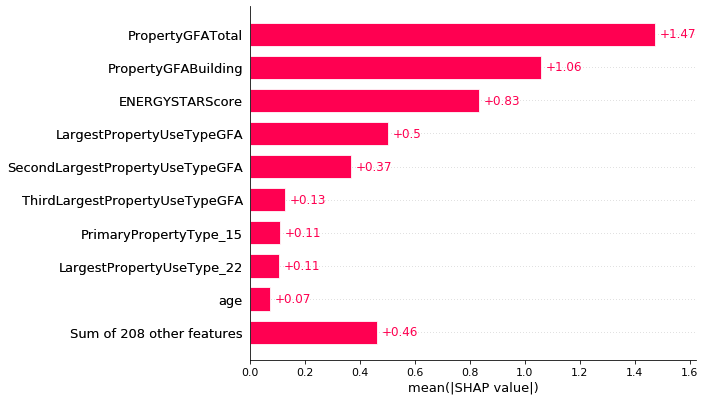

In [135]:
explainer = shap.Explainer(modelexg)
shap_values = explainer(X)
shap.plots.bar(shap_values)

les variables PropertyGFATotal ,PropertGFABuilding et ENERGYSTARScore sont indisponible pour predeire sitel

## Meilleur modéle pour la varaibale  ghgel 


In [136]:
#X=data.loc[:,['CouncilDistrictCode','ENERGYSTARScore','LargestPropertyUseTypeGFA','Latitude','Longitude','NumberofBuildings','OSEBuildingID','PropertyGFABuilding','PropertyGFAParking','PropertyGFATotal','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','YearBuilt','ZipCode']]
y=data.iloc[:,-2]
X=data.loc[:,colonnes]

#Standardscaler pour  normaliser les variable numeriques
std_scale= preprocessing.StandardScaler().fit(X)
X_scale=std_scale.transform(X)

#Split le dataset en train et test
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.25)

# modéle DummyRegressor
dm=dummy.DummyRegressor()
start_time_train=time.time()
dm.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = dm.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test_predict,y_test)))
r2 = r2_score(y_test, y_test_predict)
R1=pd.DataFrame([['RMSE',rmse],['score',r2],['train time',train_time],['test time',test_time]],columns=['indicateurs','Modéle dummy'])

# modéle Linear Regressor
lr=linear_model.LinearRegression()
start_time_train=time.time()
lr.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = lr.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test_predict,y_test)))
r2 = r2_score(y_test, y_test_predict)
R2=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle linéaire']) 

# modéle Ridge 
rg=linear_model.Ridge()
start_time_train=time.time()
rg.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = rg.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
R3=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle linéaire Ridge'])

# modéle Lasso 
ls=linear_model.Lasso()
start_time_train=time.time()
ls.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = ls.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
R4=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle linéaire Lasso'])

# modéle Random Forest Regressor 
rf=ensemble.RandomForestRegressor()
start_time_train=time.time()
rf.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = rf.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
R5=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle RandomForestRegressor'])

#modéle GradientBoosting Regressor 
gr=ensemble.GradientBoostingRegressor()
start_time_train=time.time()
gr.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = gr.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
R6=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle GradientBoostingRegressor'])

# modéle XGBRegressor
xg=xgb.XGBRegressor()
start_time_train=time.time()
xg.fit(X_train,y_train)
train_time=time.time()-start_time_train
start_time_test=time.time()
y_test_predict = xg.predict(X_test)
test_time=time.time()-start_time_test
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
R7=pd.DataFrame([[rmse],[r2],[train_time],[test_time]],columns=['Modéle XGBRegressor']) 

#affichage  resultat  pour chaque modele
pd.concat([R1,R2,R3,R4,R5,R6,R7],axis=1)



indicateurs  Modéle dummy                  Modéle linéaire  \
0        RMSE          1.63                53471681944072.06   
1       score         -0.00 -1083462038008711796897087488.00   
2  train time          0.00                             0.10   
3   test time          0.00                             0.00   

   Modéle linéaire Ridge  Modéle linéaire Lasso  Modéle RandomForestRegressor  \
0                   1.25                   1.63                          1.11   
1                   0.41                  -0.00                          0.53   
2                   0.01                   0.00                          1.54   
3                   0.00                   0.00                          0.02   

   Modéle GradientBoostingRegressor  Modéle XGBRegressor  
0                              1.10                 1.14  
1                              0.54                 0.51  
2                              0.59                 0.39  
3                              0.00                 0.01

#### Visualisation des indicateurs en fonction des différents modéles 


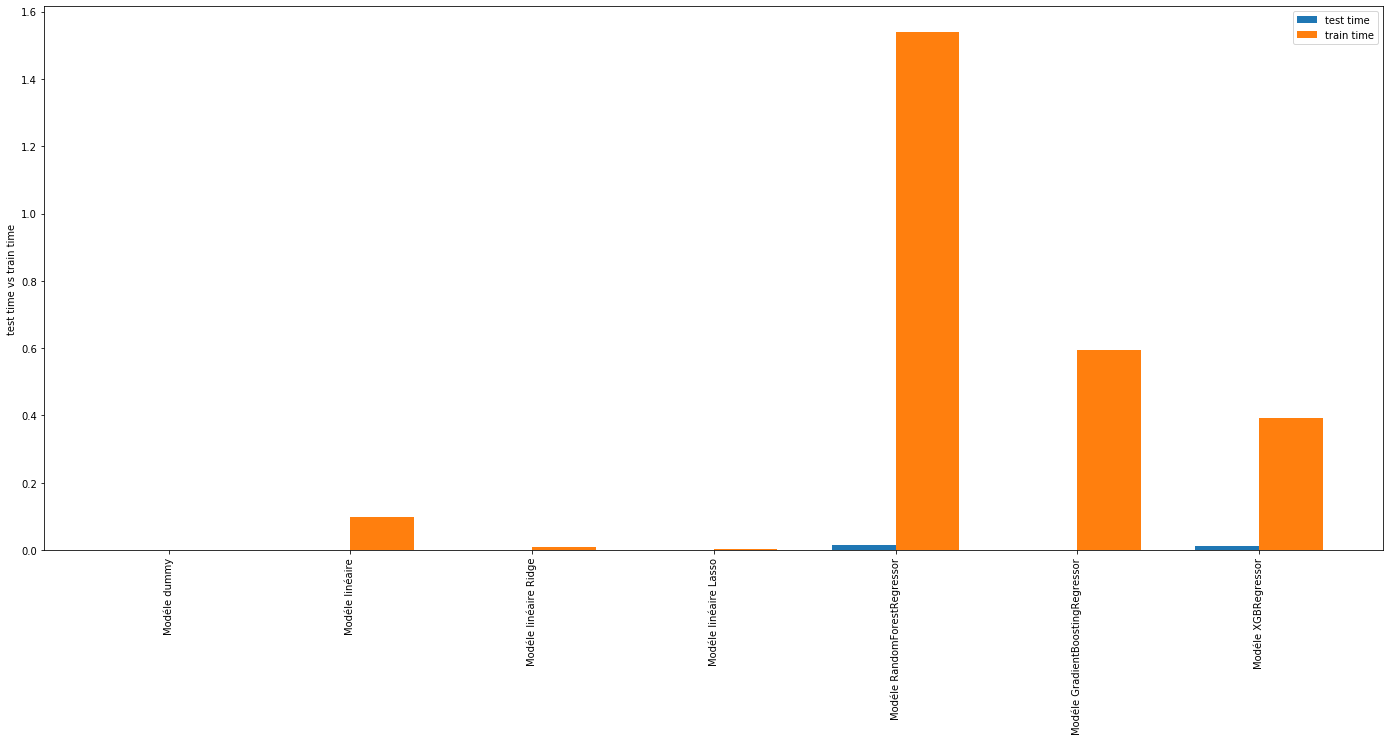

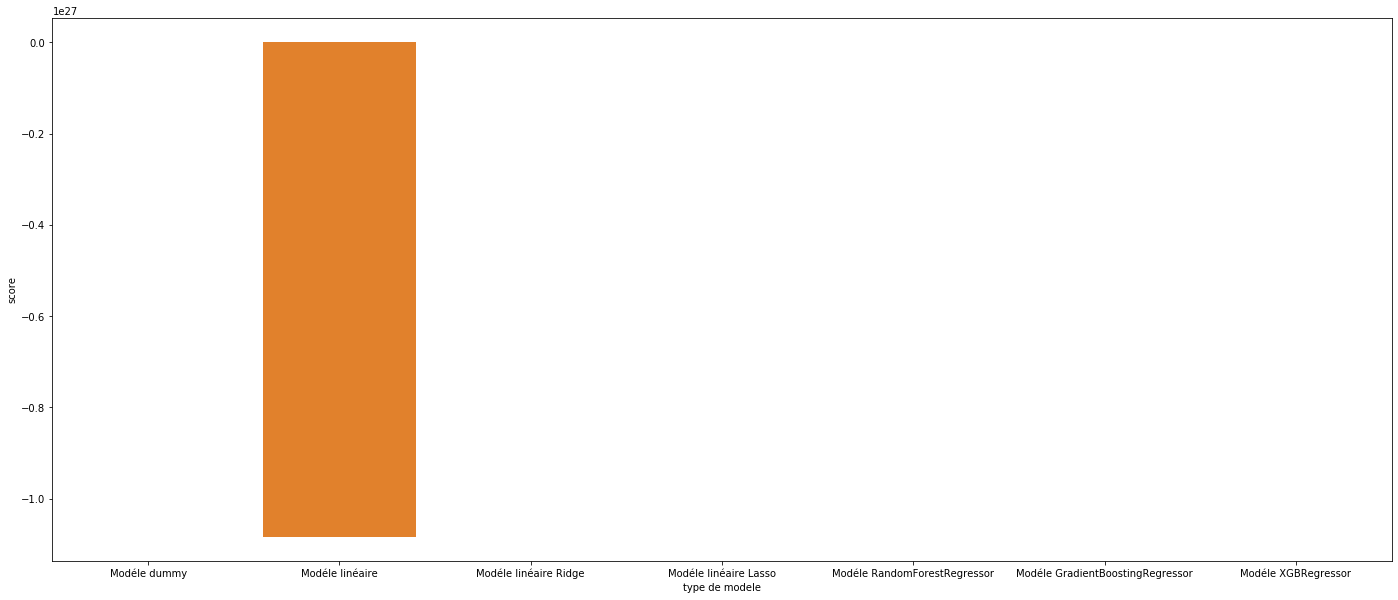

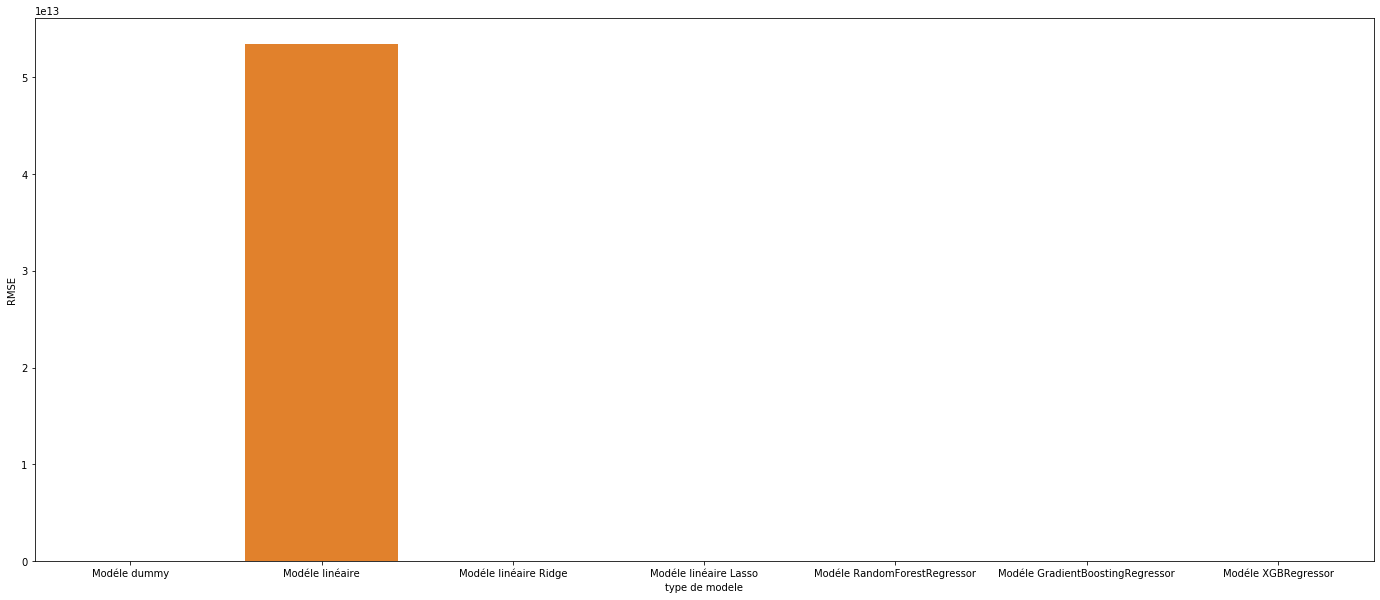

In [137]:
# creation un dataframe Re à partir des indicteurs et des modeles 
R=pd.concat([R1,R2,R3,R4,R5,R6,R7],axis=1)
Re=R.T
Re['type de modele']=Re.index
Re.rename(index={'Modele dummy':0,'Modele linéaire':1,'Modele linéaire Ridge':2,'Modele linéaire Lasso':3,'Modele RandomForestRegressor':4,'Modele GradientBoostingRegressor':5,'Modele XGBRegressor':6},columns={0:'RMSE',1:'score',2:'train time',3:'test time'}, inplace=True)
Re.drop('indicateurs',inplace=True)
Re=Re[['type de modele','RMSE', 'score', 'train time', 'test time']]

x = np.arange(len(Re['type de modele']))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(24,10))
ax.bar(x - width/2,Re['test time'],width,label='test time')
ax.bar(x + width/2,Re['train time'] ,width,label='train time')
ax.set_xticks(x)
ax.set_xticklabels(Re['type de modele'],rotation=90)
ax.set_ylabel('test time vs train time')
ax.legend()
plt.figure(figsize=(24,10))
sns.barplot(data=Re,x='type de modele',y='score')
plt.figure(figsize=(24,10))
sns.barplot(data=Re,x='type de modele',y='RMSE')

le temps du train est superieur à celui du test pour les tous le modeles

###  Entraînement avec cross validation : les modéles sans paramétres 

In [138]:
cv=KFold(5)
# modéle DummyRegressor
all_accuracies1 = cross_val_score(estimator=dm, X=X_train, y=y_train, cv=cv)

# modéle Linear Regressor
all_accuracies2 = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=cv)

# modéle GradientBoosting Regressor
all_accuracies3 = cross_val_score(estimator=gr, X=X_train, y=y_train, cv=cv)

# modéle lasso 
all_accuracies4 = cross_val_score(estimator=ls, X=X_train, y=y_train, cv=cv)

# modéle ridge 
all_accuracies5 = cross_val_score(estimator=ls, X=X_train, y=y_train, cv=cv)

#modéle XGBRegressor
all_accuracies6 = cross_val_score(estimator=xg, X=X_train, y=y_train, cv=cv)

#modéle Random forest Regressoor  
all_accuracies7 = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=cv)

pd.DataFrame([['Modéle Random forest Regressoor',all_accuracies7.mean()],['Modéle XGBRegressor',all_accuracies6.mean()],['Modéle GradientBoosting Regressor',all_accuracies3.mean()],['Modéle ridge',all_accuracies5.mean()],['Modéle lasso',all_accuracies4.mean()],['Modéle Linear Regressor',all_accuracies2.mean()],['Modéle DummyRegressor',all_accuracies1.mean()]],columns=['Cross Validation : Modéle','Score'])

Cross Validation : Modéle                            Score
0    Modéle Random forest Regressoor                             0.54
1                Modéle XGBRegressor                             0.52
2  Modéle GradientBoosting Regressor                             0.54
3                       Modéle ridge                            -0.01
4                       Modéle lasso                            -0.01
5            Modéle Linear Regressor -2119110281923720437206876160.00
6              Modéle DummyRegressor                            -0.01

On prend les modeles: Random forest Regressoor,GradientBoosting Regressor et XGBRegressor 

### Optimisation  des modèles avec Gridsearch(RandomizedSearch)

In [139]:
# random forest regressor
param_grid ={  'max_depth': [10, 20], 'max_features': ['auto', 'sqrt'], 
              'n_estimators':[200,600],'ccp_alpha':[0,0.1,5],'warm_start':[True],
              
              'min_samples_split':[5,20,10],'criterion':['mse','mae']}

g_search = RandomizedSearchCV(estimator = rf, param_distributions= param_grid,cv = 5, n_jobs = -1, verbose = 0,scoring="r2")
g_search.fit(X_train, y_train)
pd.DataFrame([['Modéle random forest regressor',g_search.best_score_,g_search.best_params_]],columns=['Modéle','Score','Best _params'])

Modéle    Score  \
0  Modéle random forest regressor     0.53   

                                                                                                                                      Best _params  
0  {'warm_start': True, 'n_estimators': 200, 'min_samples_split': 20, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'mse', 'ccp_alpha': 0}

In [118]:
#modele GradientBoosting Regressor
parameter = {"criterion": ["friedman_mse",  "mae"],
              "max_features":["log2","sqrt"],
              'learning_rate': [0.1,1,0.01], 
              'max_depth': [13,4,25],
              'min_samples_leaf': [2,4],
              'min_samples_split':[5,7,10],
              'subsample': [0.2,0.3],
              'n_estimators': [600,400],
              }

gr_grid = GridSearchCV(gr,
                        parameter,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

gr_grid.fit(X_train,y_train)

pd.DataFrame([['Modéle GradientBoosting Regressor',gr_grid.best_score_,gr_grid.best_params_]],columns=['Modéle','Score','Best _params'])

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.


modéle    Score  \
0  modele GradientBoosting Regressor     0.56   

                                                                                                                                                                 best _params  
0  {'criterion': 'mae', 'learning_rate': 0.01, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600, 'subsample': 0.3}

In [143]:
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [0.03, 0.05, 0.7], 
              'max_depth': [17,10],
              'min_child_weight': [1,2,3],
              'subsample': [0.6,0.7,0.8,0.1],
              'colsample_bytree': [ 0.7,12,17],
              'n_estimators':[900,1000],
              'gamma':[ 0.0, 0.1, 0.2 , 0.3 ],
              'min_samples_split':[12,4,22]}

xg_grid = RandomizedSearchCV(xg,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xg_grid.fit(X_train,y_train)
pd.DataFrame([['Modéle XGBRegressor',xg_grid.best_score_,xg_grid.best_params_]],columns=['Modéle','Score','Best _params'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


One or more of the test scores are non-finite: [0.55862599 0.56181168 0.52696689        nan        nan 0.28153319
        nan        nan        nan 0.16209565]


[16:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Modéle    Score  \
0  Modéle XGBRegressor     0.56   

                                                                                                                                                                                                       Best _params  
0  {'subsample': 0.8, 'objective': 'reg:linear', 'nthread': 4, 'n_estimators': 1000, 'min_samples_split': 22, 'min_child_weight': 2, 'max_depth': 17, 'learning_rate': 0.03, 'gamma': 0.2, 'colsample_bytree': 0.7}

###  Entraînement avec cross validation : les modéles optimisés avec  paramétres 


In [144]:
cv=KFold(5)

modelerf=g_search.best_estimator_
modelegr=gr_grid.best_estimator_
modelexg=xg_grid.best_estimator_

# modele GradientBoosting Regressor
all_accuracies3 = cross_val_score(estimator=modelegr, X=X_train, y=y_train, cv=cv)

#modele XGBRegressor
all_accuracies6 = cross_val_score(estimator=modelexg, X=X_train, y=y_train, cv=cv)

#modele Random forest Regressoor  
all_accuracies7 = cross_val_score(estimator=modelerf, X=X_train, y=y_train, cv=cv)

pd.DataFrame([['Modéle Random forest Regressoor',all_accuracies7.mean()],['Modéle XGBRegressor',all_accuracies6.mean()],['Modéle GradientBoosting Regressor',all_accuracies3.mean()]],columns=['Cross Validation : Modéle','Score'])

criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.


[16:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  

Cross Validation : Modéle    Score
0    Modéle Random forest Regressoor     0.53
1                Modéle XGBRegressor     0.56
2  Modéle GradientBoosting Regressor     0.54

#### Selection des futures importantes

In [145]:
explainer = shap.Explainer(modelexg)
shap_values = explainer(X)
shap.plots.bar(shap_values)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


les variables PropertyGFATotal ,PropertGFABuilding et ENERGYSTARScore sont indisponible pour predeire sitel